In [36]:
import numpy as np
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt

In [2]:
def relu(x):
    return (abs(x) + x) / 2

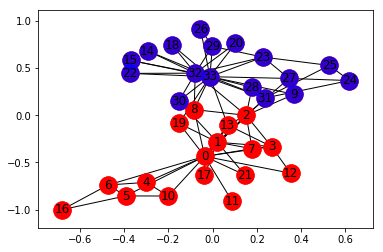

In [35]:
import networkx.generators.social as socialnx
G = socialnx.karate_club_graph()
pos = nx.spring_layout(G)
edges = G.edges()
nodelist1 = []
nodelist2 = []
for i in range (34):
    if G.nodes[i]['club'] == 'Mr. Hi':
        nodelist1.append(i)
    else:
        nodelist2.append(i)
nx.draw_networkx(G, pos, edges=edges);
nx.draw_networkx_nodes(G, pos, nodelist=nodelist1, node_size=300, node_color='r',alpha = 0.8)
nx.draw_networkx_nodes(G, pos, nodelist=nodelist2, node_size=300, node_color='b',alpha = 0.8)

In [37]:
order = sorted(list(G.nodes()))
A = to_numpy_matrix(G, nodelist=order)
I = np.eye(G.number_of_nodes())
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [40]:
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))

In [48]:
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

In [49]:
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

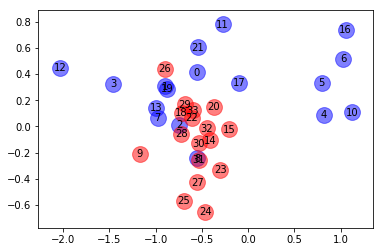

In [50]:
for i in range (34):
    if G.nodes[i]['club'] == 'Mr. Hi':
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),color = 'b',alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
        # 为每个点添加标签，一些形如（x轴，y轴，标签）的元组，水平及垂直位置，背景颜色
    else:
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label = 'i',color = 'r',alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
        # plt.scatter(np.array(output)[:,0],np.array(output)[:,1],label = 0:33)
